## Library Imports

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import joblib
import os
import math 
import cv2
import time
import mediapipe as mp
import urllib.request
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from collections import deque



# Data loading

In [52]:
df=pd.read_csv("../data/hand_landmarks_data.csv")

# Data exploration

In [13]:
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [43]:
df.shape

(25675, 64)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [45]:
df.isnull().sum().sort_values(ascending=False)

x1       0
y1       0
y12      0
z12      0
x13      0
        ..
z9       0
x10      0
y10      0
z10      0
label    0
Length: 64, dtype: int64

In [46]:
df['label'].value_counts()

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

In [47]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


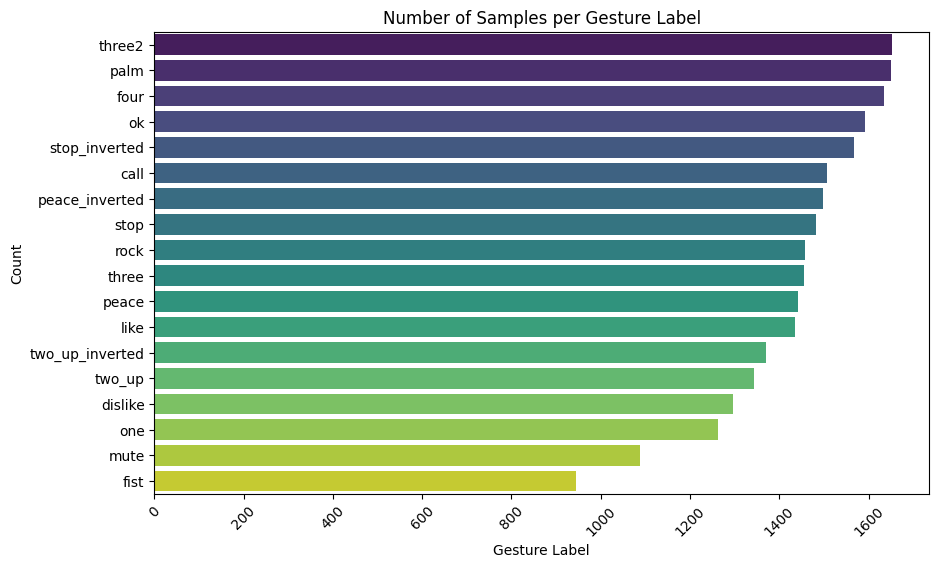

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,y='label',order=df['label'].value_counts().index, palette='viridis')
plt.title("Number of Samples per Gesture Label")
plt.xlabel("Gesture Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


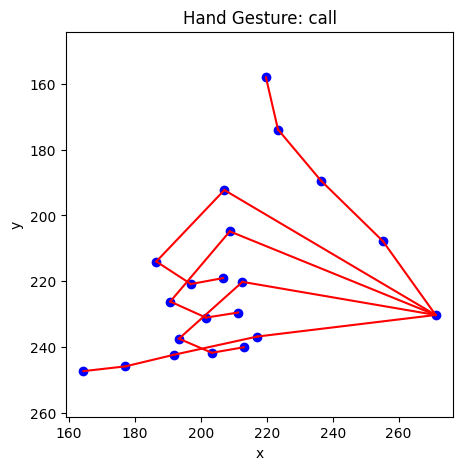

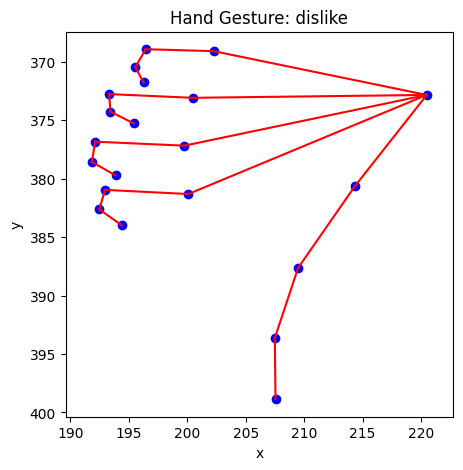

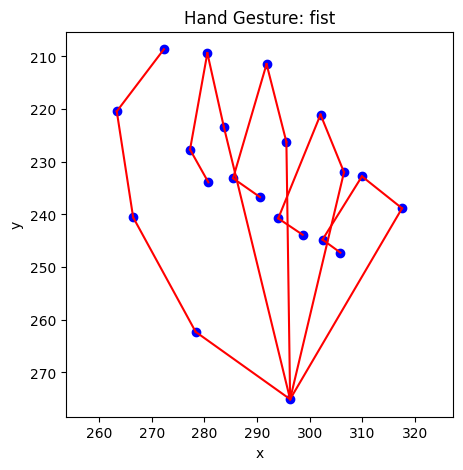

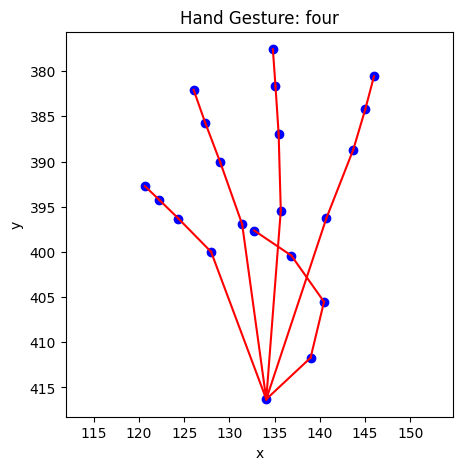

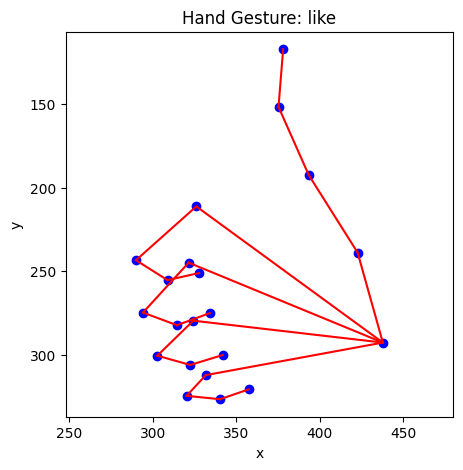

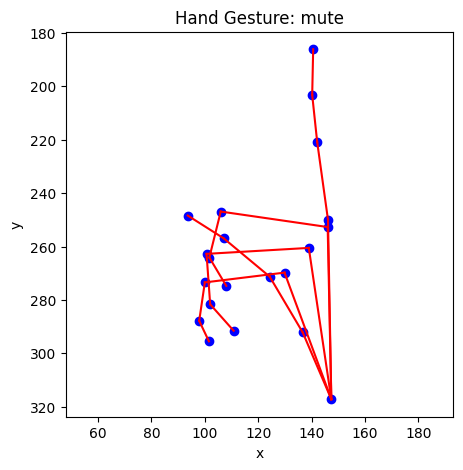

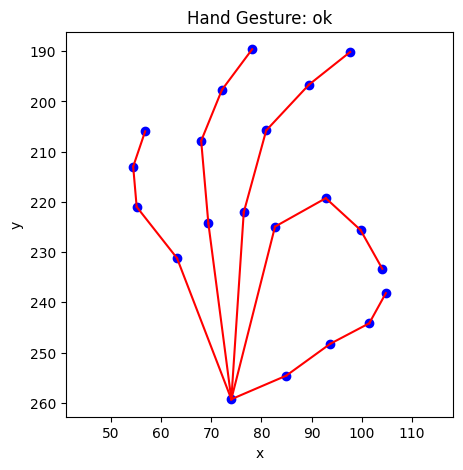

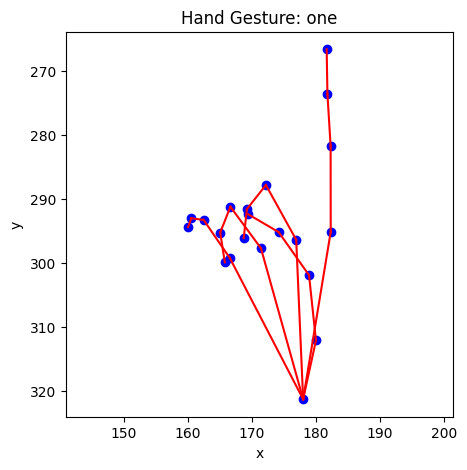

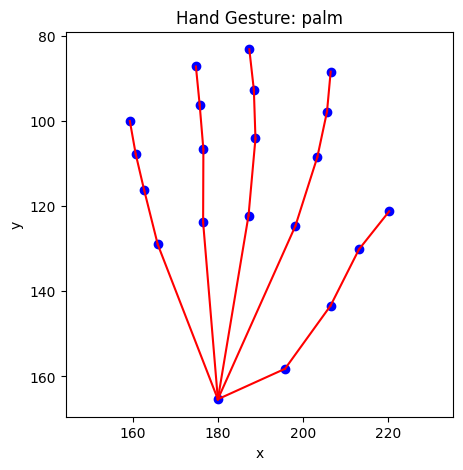

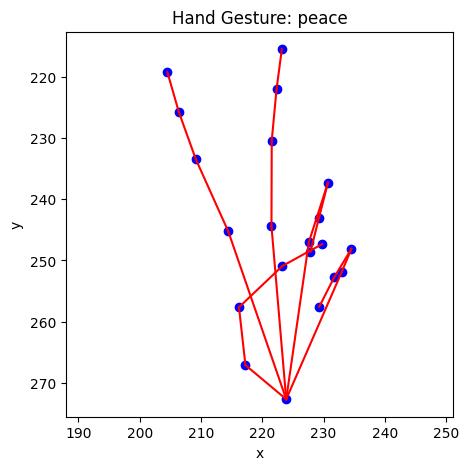

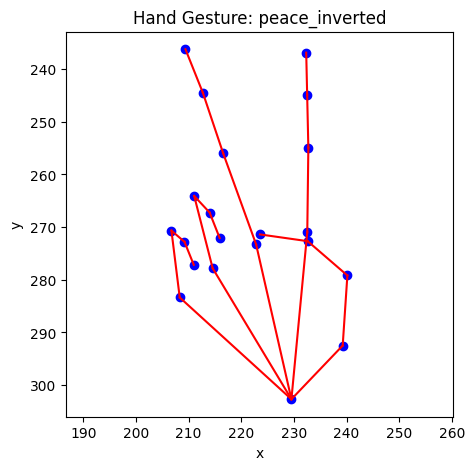

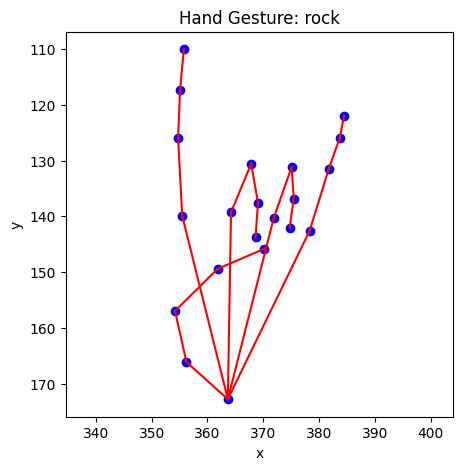

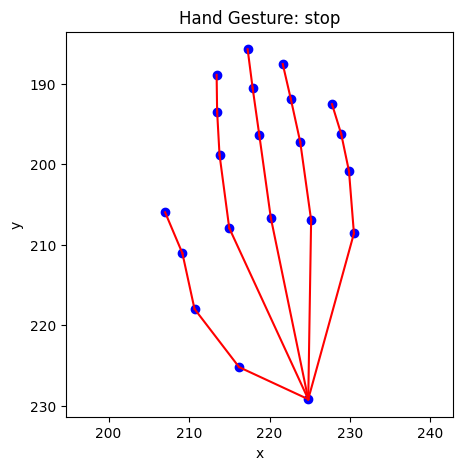

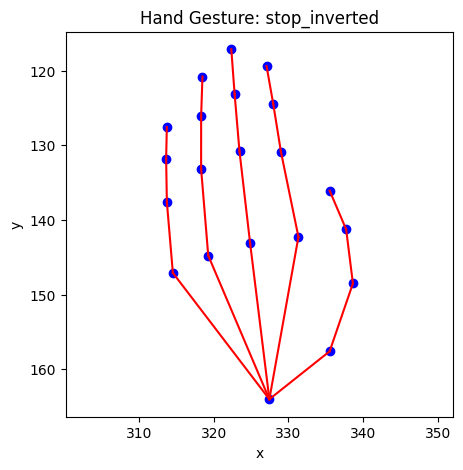

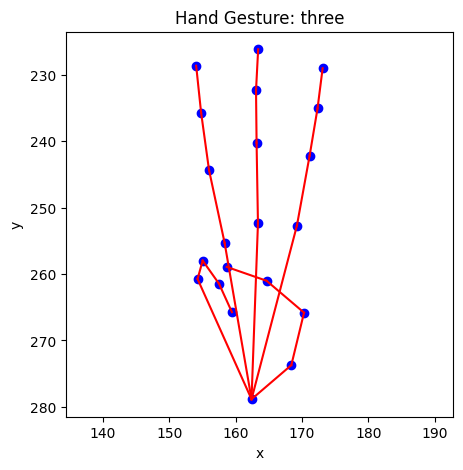

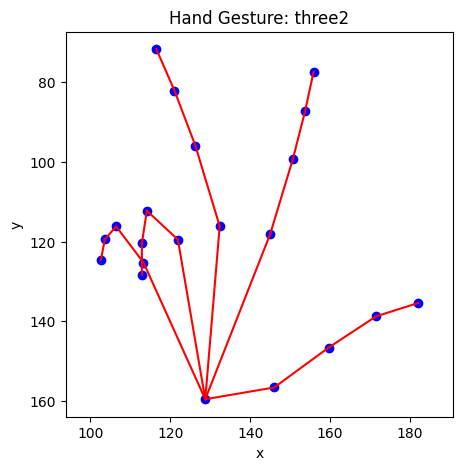

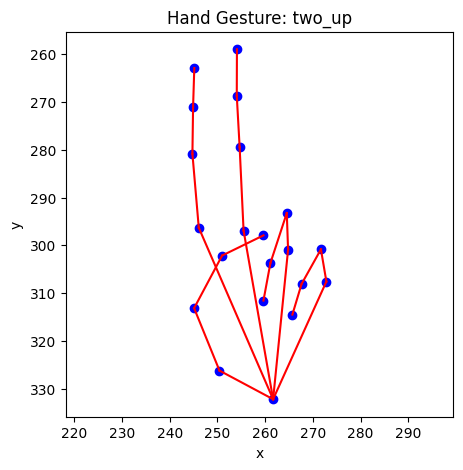

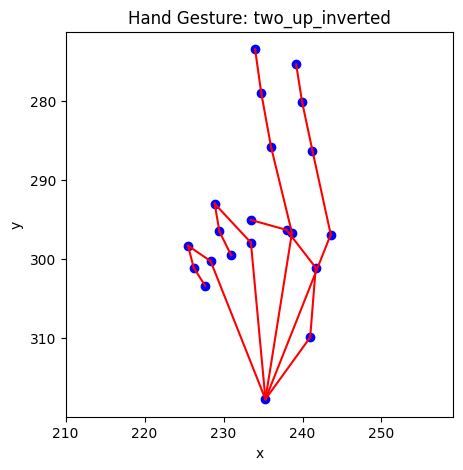

In [49]:
x_cols = [col for col in df.columns if 'x' in col.lower()]
y_cols = [col for col in df.columns if 'y' in col.lower()]
z_cols = [col for col in df.columns if 'z' in col.lower()]

connections = [
    (0,1),(1,2),(2,3),(3,4),       # Thumb
    (0,5),(5,6),(6,7),(7,8),       # Index
    (0,9),(9,10),(10,11),(11,12),  # Middle
    (0,13),(13,14),(14,15),(15,16),# Ring
    (0,17),(17,18),(18,19),(19,20) # Pinky
]

for label in df['label'].unique():
    samples = df[df['label'] == label].sample(n=1, random_state=42)

    for idx, sample in samples.iterrows():
        x = sample[x_cols].values
        y = sample[y_cols].values
        z = sample[z_cols].values if len(z_cols) > 0 else None
        plt.figure(figsize=(5,5))
        plt.scatter(x, y, color='blue')
        
        for start, end in connections:
            plt.plot([x[start], x[end]], [y[start], y[end]], color='red')
        
        plt.title(f"Hand Gesture: {label}")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.gca().invert_yaxis()
        plt.axis('equal') 
        plt.show()

**Recenter (x, y) landmarks using wrist point as origin**

**Normalize landmarks by dividing by mid-finger tip position**

In [53]:
def preprocess_landmarks(sample):
    
    landmarks = sample.reshape(21, 3)
    landmarks = landmarks - landmarks[0]
    scale = np.linalg.norm(landmarks[12])

    if scale != 0:
        landmarks = landmarks / scale

    return landmarks.flatten()

# Hand Gesture Classification – Training Pipeline

## Data Preparation 

In [54]:
le = LabelEncoder()
y = le.fit_transform(df['label'])
X = df.drop('label', axis=1).values
X_processed = np.array([preprocess_landmarks(sample) for sample in X])


## Dataset Splitting

In [55]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

## Model Selection

In [65]:
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf',C=100,gamma=.1, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)  
}


## Model Training, Evaluation & Saving models


--- Training RandomForest ---
Validation Metrics for RandomForest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       301
           1       1.00      1.00      1.00       259
           2       0.99      0.99      0.99       189
           3       0.96      0.97      0.97       327
           4       1.00      0.99      0.99       287
           5       0.97      0.99      0.98       217
           6       1.00      0.99      0.99       319
           7       0.97      0.97      0.97       253
           8       0.97      0.96      0.96       330
           9       0.96      0.95      0.96       288
          10       0.96      0.96      0.96       299
          11       1.00      0.98      0.99       292
          12       0.93      0.97      0.95       296
          13       0.99      1.00      0.99       313
          14       0.99      0.95      0.97       291
          15       0.99      0.99      0.99       331
          16 

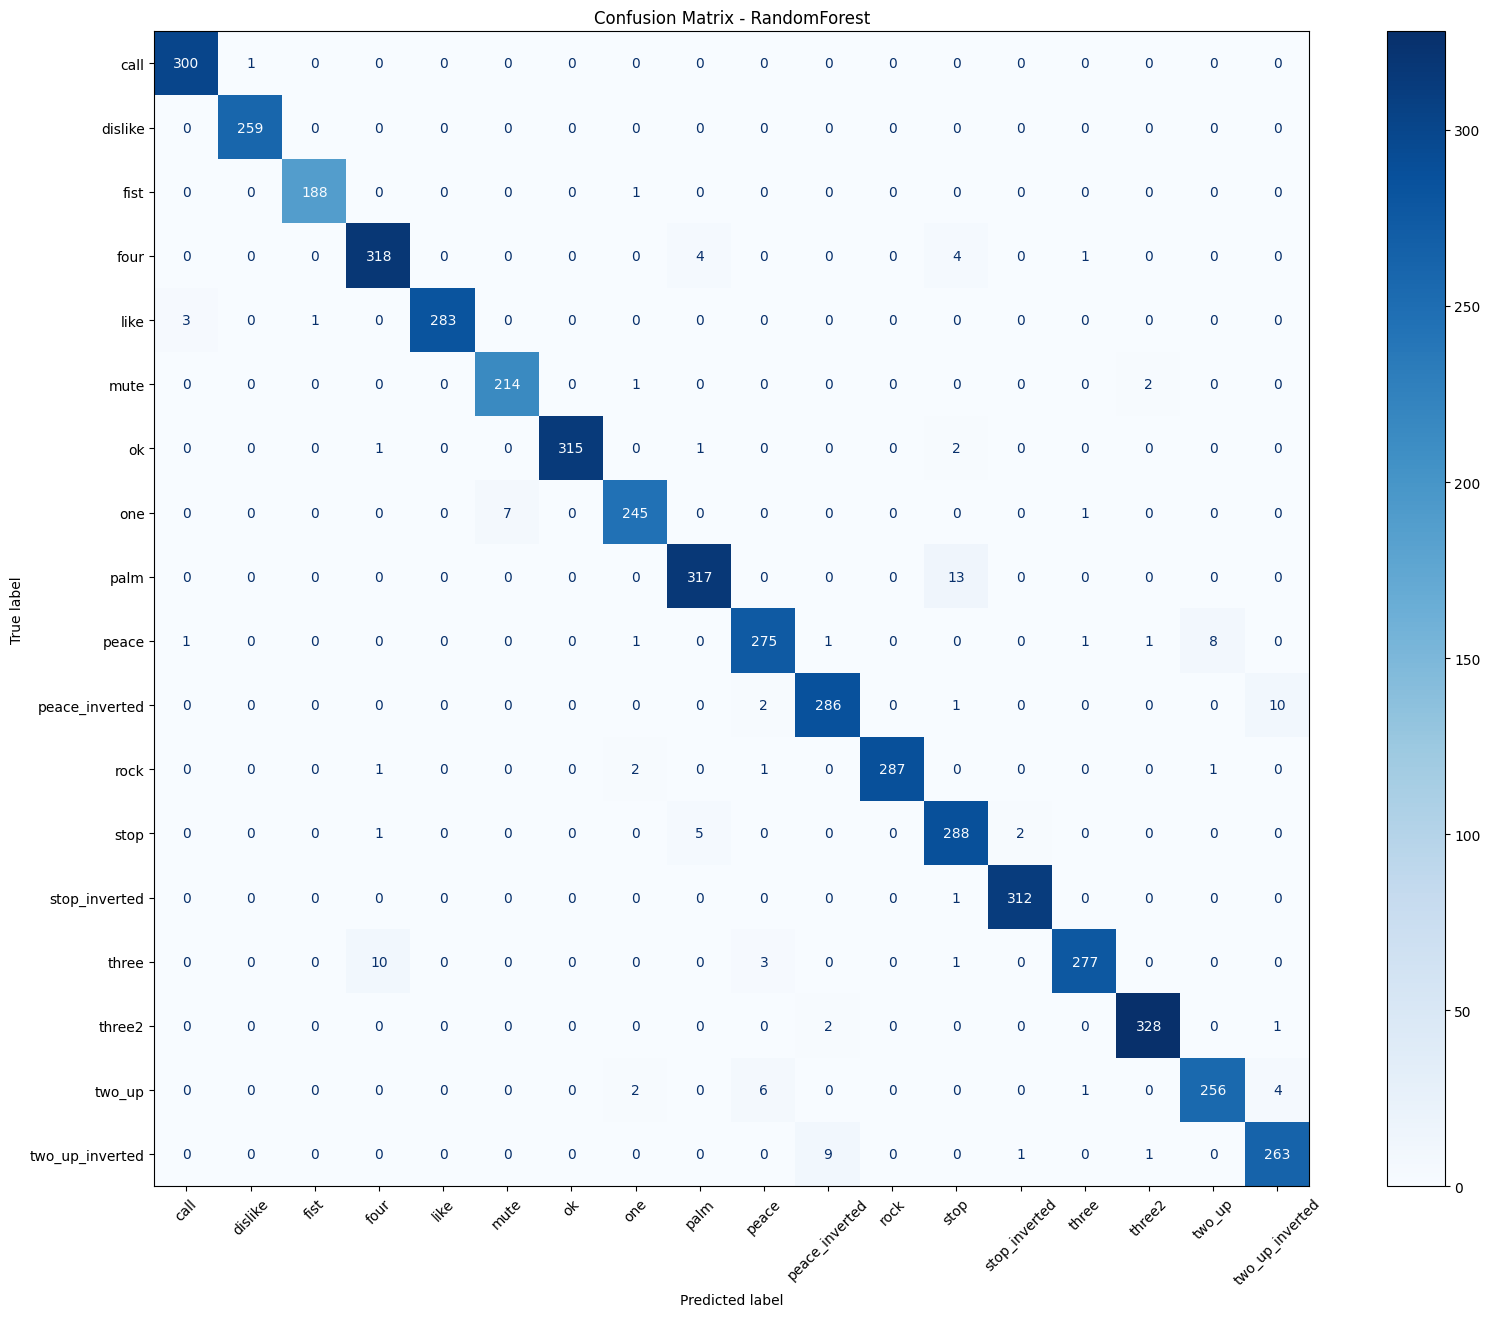

Saved RandomForest pipeline to ../models/RandomForest.pkl

--- Training SVM ---
Validation Metrics for SVM:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       301
           1       1.00      1.00      1.00       259
           2       0.99      0.99      0.99       189
           3       0.97      0.99      0.98       327
           4       0.99      0.99      0.99       287
           5       0.96      0.98      0.97       217
           6       1.00      0.99      0.99       319
           7       0.97      0.96      0.97       253
           8       0.98      0.97      0.98       330
           9       0.97      0.97      0.97       288
          10       1.00      0.98      0.99       299
          11       0.99      0.98      0.98       292
          12       0.93      0.98      0.96       296
          13       0.99      0.97      0.98       313
          14       0.99      0.97      0.98       291
          15       1.00    

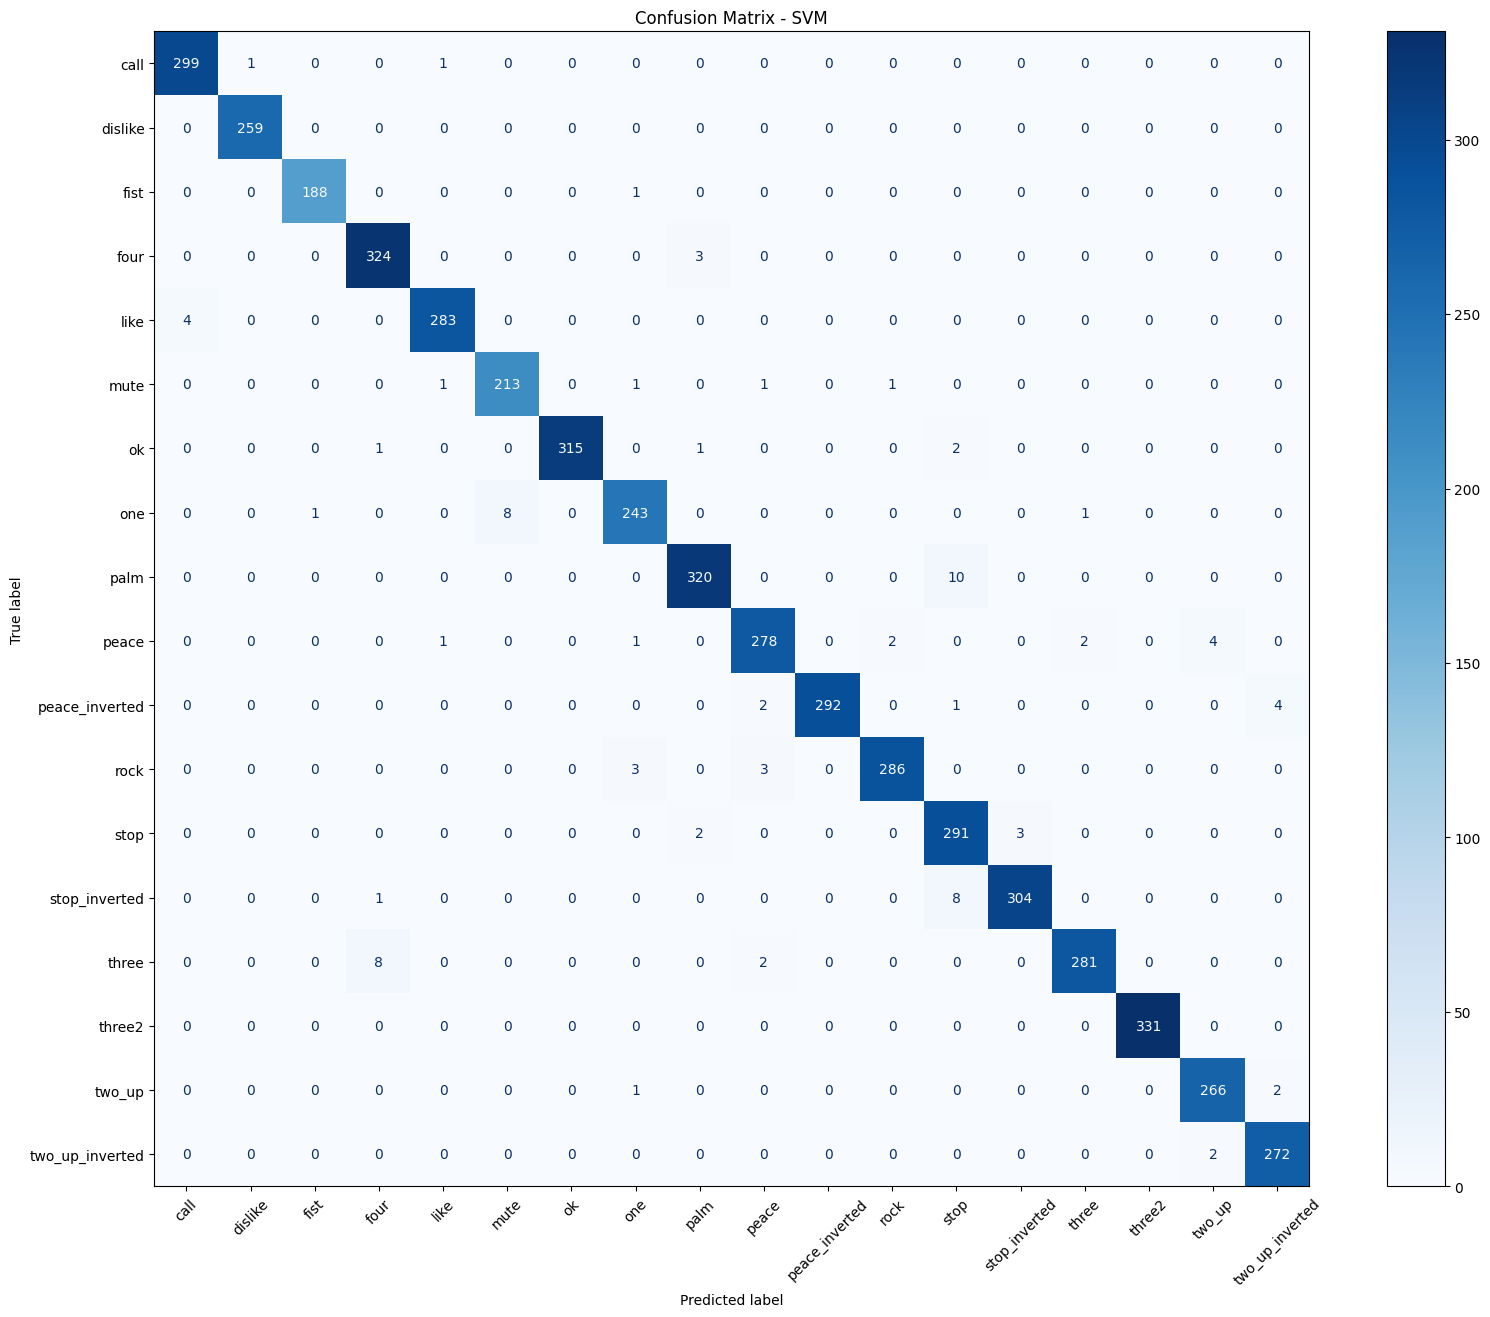

Saved SVM pipeline to ../models/SVM.pkl

--- Training KNN ---
Validation Metrics for KNN:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       301
           1       1.00      1.00      1.00       259
           2       1.00      0.99      1.00       189
           3       0.96      0.99      0.97       327
           4       0.99      0.98      0.99       287
           5       0.96      1.00      0.98       217
           6       1.00      0.99      0.99       319
           7       0.98      0.96      0.97       253
           8       0.98      0.97      0.98       330
           9       0.96      0.96      0.96       288
          10       0.99      0.94      0.96       299
          11       1.00      0.98      0.99       292
          12       0.89      0.95      0.92       296
          13       0.95      0.93      0.94       313
          14       0.99      0.96      0.98       291
          15       0.99      1.00      0.99  

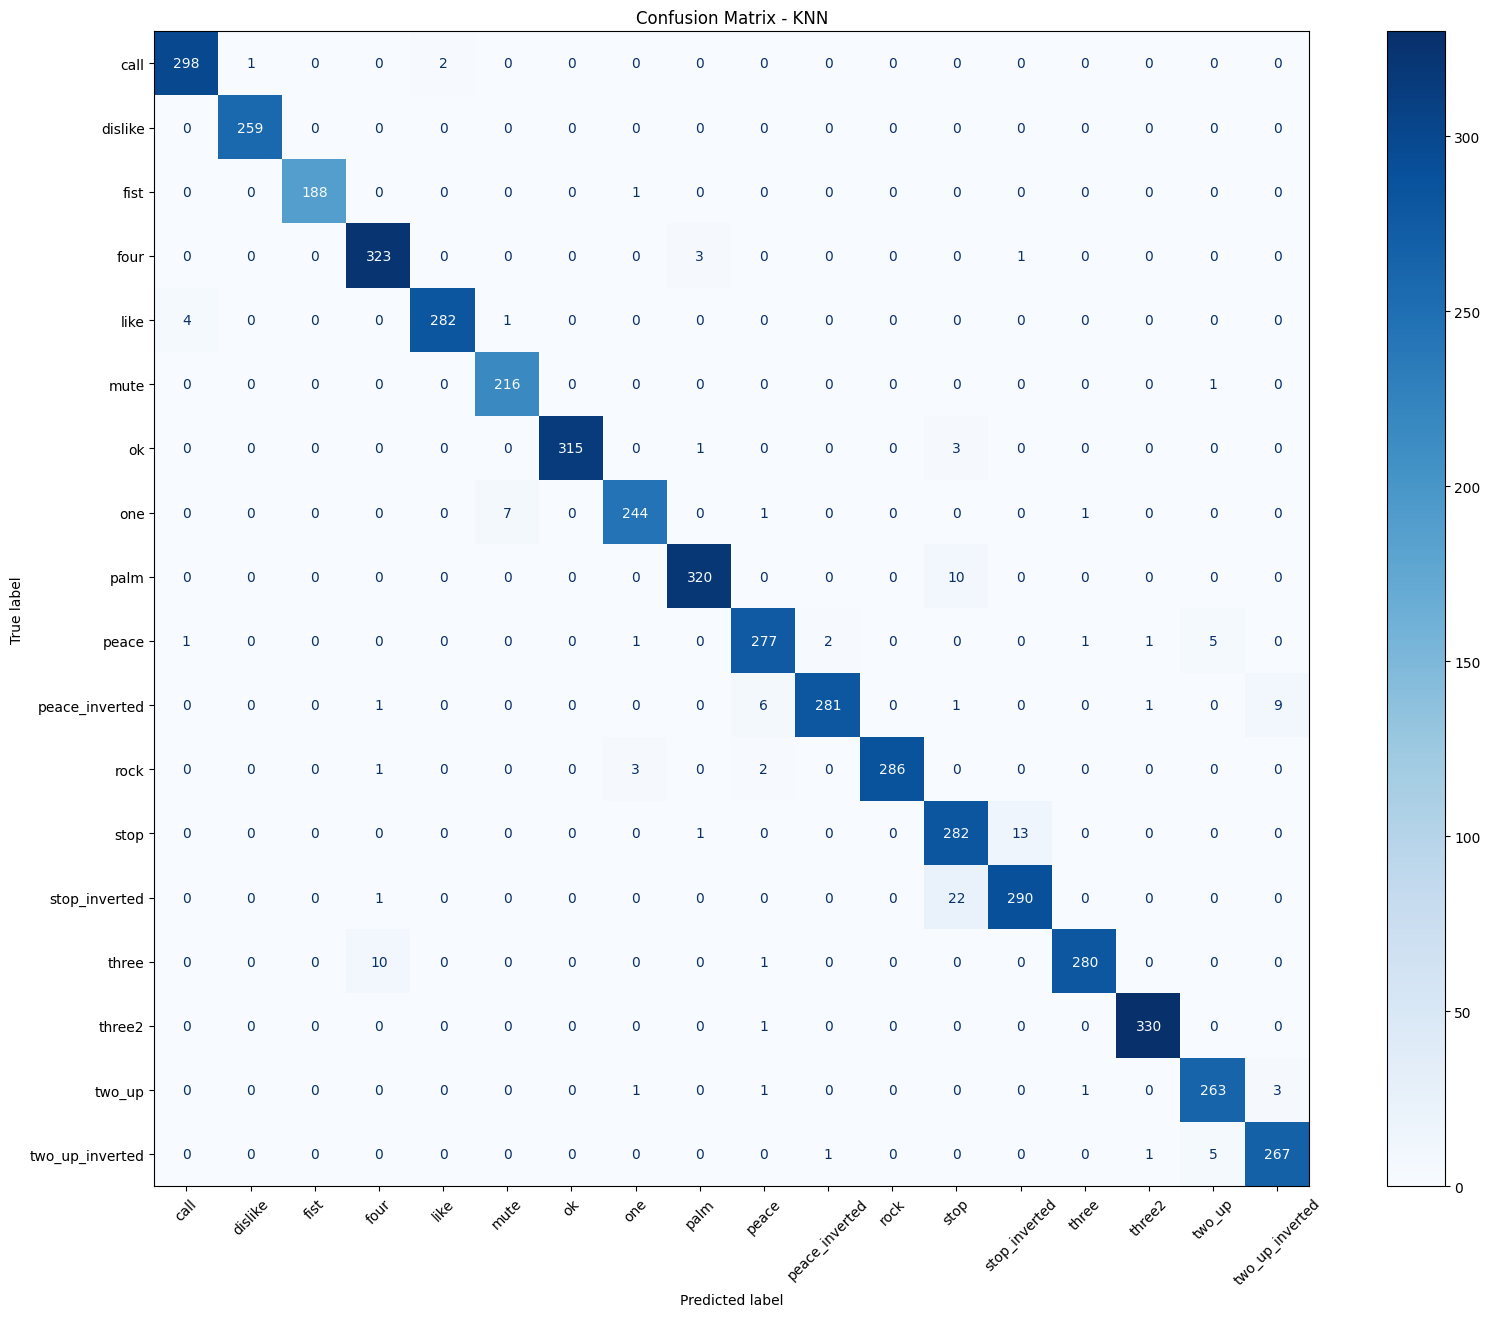

Saved KNN pipeline to ../models/KNN.pkl


In [66]:
os.makedirs("../models", exist_ok=True)
os.makedirs("../models/confusion_matrices", exist_ok=True)

results = []
for name, model in models.items():
    print(f"\n--- Training {name} ---")


    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)

    val_acc = accuracy_score(y_val, y_val_pred)
    val_prec = precision_score(y_val, y_val_pred, average='weighted', zero_division=0)
    val_rec = recall_score(y_val, y_val_pred, average='weighted', zero_division=0)
    val_f1 = f1_score(y_val, y_val_pred, average='weighted', zero_division=0)

    print(f"Validation Metrics for {name}:")
    print(classification_report(y_val, y_val_pred, zero_division=0))

    results.append({
        "Model": name,
        "Accuracy": val_acc,
        "Precision": val_prec,
        "Recall": val_rec,
        "F1-Score": val_f1
    })
    labels = le.classes_ 
    fig, ax = plt.subplots(figsize=(20, 15))
    y_val_original = le.inverse_transform(y_val)     
    y_val_pred_original = le.inverse_transform(y_val_pred)
    cm = confusion_matrix(y_val_original, y_val_pred_original, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=45, values_format='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    cm_filename = f"../models/confusion_matrices/{name}_confusion_matrix.png"
    plt.savefig(cm_filename)
    plt.close()

    model_filename = f"../models/{name}.pkl"
    joblib.dump(model, model_filename)
    print(f"Saved {name} pipeline to {model_filename}")

## Save Label Encoder for Deployment

In [67]:
joblib.dump(le, "../models/label_encoder.pkl")
print("Saved label encoder to models/label_encoder.pkl")

Saved label encoder to models/label_encoder.pkl


## Model comparison

In [68]:
results_df = pd.DataFrame(results)
print("\n--- Model Comparison ---")
print(results_df)



--- Model Comparison ---
          Model  Accuracy  Precision    Recall  F1-Score
0  RandomForest  0.975852   0.976064  0.975852  0.975887
1           SVM  0.982473   0.982712  0.982473  0.982508
2           KNN  0.973905   0.974445  0.973905  0.973999


## Overfitting Evaluation on Test Dataset

In [71]:
for name, model in models.items():
    pipeline = joblib.load(f"../models/{name}.pkl")
    y_test_pred = pipeline.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"{name} Test Accuracy: {test_acc:.4f}")


RandomForest Test Accuracy: 0.9739
SVM Test Accuracy: 0.9871
KNN Test Accuracy: 0.9753


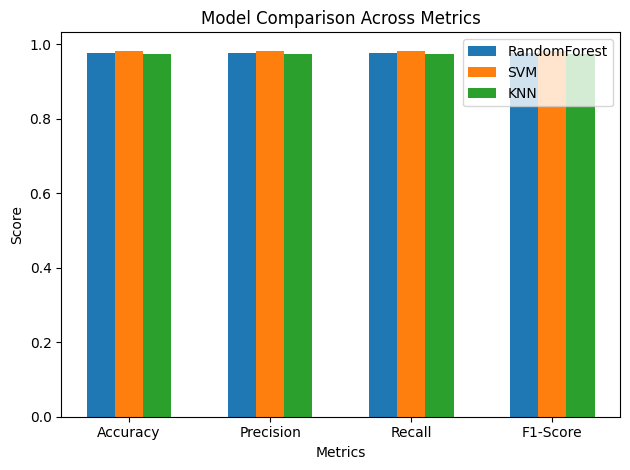

In [70]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
Models = results_df["Model"]
x = np.arange(len(metrics))
width = 0.2
plt.figure()

for i, model in enumerate(Models):
    plt.bar(x + i*width, results_df.loc[i, metrics], width, label=model)
plt.xticks(x + width * (len(Models)-1)/2, metrics)
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.title("Model Comparison Across Metrics")
plt.legend()

plt.tight_layout()
plt.show()

The best performing model is Support Vector Machine (SVM) with C = 100 and gamma = 0.1.

It achieved the highest Accuracy and F1-Score among all tested models, so it was selected as the final model and integrated with the MediaPipe hand landmark pipeline for real-time gesture recognition.

# Real-Time Hand Gesture Recognition  
### MediaPipe Tasks API + SVM Classifier

In [ ]:
model_path = "hand_landmarker.task"
model_url = "https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task"

if not os.path.exists(model_path):
    print(f"Downloading {model_path} from Google...")
    urllib.request.urlretrieve(model_url, model_path)
    print("Download complete!")

model = joblib.load("../models/SVM.pkl")
le = joblib.load("../models/label_encoder.pkl")

base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=1,
    min_hand_detection_confidence=0.7,
    min_hand_presence_confidence=0.7,
    min_tracking_confidence=0.9
)
detector = vision.HandLandmarker.create_from_options(options)

HAND_CONNECTIONS = [(0,1), (1,2), (2,3), (3,4), (0,5), (5,6), (6,7), (7,8), 
                    (5,9), (9,10), (10,11), (11,12), (9,13), (13,14), (14,15), 
                    (15,16), (13,17), (0,17), (17,18), (18,19), (19,20)]

input_video_path = "../data/Sample2.mp4"
cap = cv2.VideoCapture(input_video_path)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(
    "../output/output_video.mp4",
    fourcc,
    cap.get(cv2.CAP_PROP_FPS),
    (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
)

prev_time = 0
landmark_buffer = deque(maxlen=25) 

cv2.namedWindow("Gesture Recognition", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Gesture Recognition", 960, 720)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)
    
    result = detector.detect(mp_image)

    if result.hand_landmarks:
        for hand_landmarks in result.hand_landmarks:
            landmarks = []
            
            for conn in HAND_CONNECTIONS:
                pt1 = hand_landmarks[conn[0]]
                pt2 = hand_landmarks[conn[1]]
                x1, y1 = int(pt1.x * frame.shape[1]), int(pt1.y * frame.shape[0])
                x2, y2 = int(pt2.x * frame.shape[1]), int(pt2.y * frame.shape[0])
                cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                
            for lm in hand_landmarks:
                x, y = int(lm.x * frame.shape[1]), int(lm.y * frame.shape[0])
                cv2.circle(frame, (x, y), 5, (0, 0, 255), -1)
                landmarks.extend([lm.x, lm.y, lm.z])

            landmarks = np.array(landmarks)
            landmark_buffer.append(landmarks)

            if len(landmark_buffer) == landmark_buffer.maxlen:
                smoothed_landmarks = np.mean(landmark_buffer, axis=0)
            else:
                smoothed_landmarks = landmarks

            processed = preprocess_landmarks(smoothed_landmarks).reshape(1, -1)
            prediction_num = model.predict(processed)[0]
            
            prediction_label = le.inverse_transform([prediction_num])[0] 

            cv2.putText(
                frame,
                f"Gesture: {prediction_label}", 
                (10, 40),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,
                (0, 255, 0),
                2
            )

    curr_time = time.time()
    fps = 1 / (curr_time - prev_time) if prev_time else 0
    prev_time = curr_time
    cv2.putText(frame, f'FPS: {int(fps)}', (10, 80),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    out.write(frame)

    cv2.imshow("Gesture Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

## Inference Pipeline

For each video frame:

🔹 Detect 21 hand landmarks  
🔹 Draw hand skeleton  
🔹 Extract normalized (x, y, z) coordinates  
🔹 Apply preprocessing (same as training)  
🔹 Predict gesture using trained SVM  
🔹 Decode label & display result  
🔹 Show real-time FPS